<a href="https://colab.research.google.com/github/puranjay123/100_Days_of_MachineLearning/blob/main/Flowers_cluster_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x = iris_df.iloc[:,[0,1,2,3]].values

#finding the number of clusters using elbow method

In [6]:
from sklearn.cluster import KMeans
clust =[]

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state=0)
  kmeans.fit(x)
  clust.append(kmeans.inertia_)

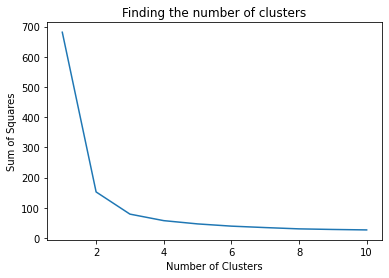

In [9]:
plt.plot(range(1,11),clust)
plt.title('Finding the number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel("Sum of Squares")

#plt.show in notebooks in uncessary but it 
# is required when run in terminal to show the grpah
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 300,n_init = 10,random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

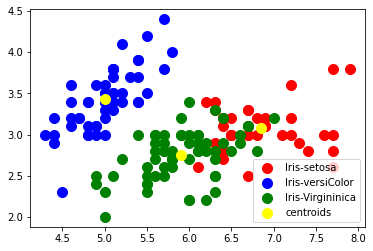

In [12]:
plt.scatter(x[y_kmeans ==0,0],x[y_kmeans==0,1],s = 100,c = 'red',label ='Iris-setosa' )
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans==1,1],s = 100,c = 'blue',label ='Iris-versiColor')
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans==2,1],s = 100,c = 'green',label ='Iris-Virgininica')

#Now plotting centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'yellow',label = 'centroids')
plt.legend()